In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv('engineered_data_train.csv')
data_test = pd.read_csv('engineered_data_test.csv')

X_train = data_train.drop('Y', axis=1)
y_train = data_train['Y']

X_test = data_test.drop('Y', axis=1)
y_test = data_test['Y']

In [3]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 49, max_depth=20)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=49, verbose=0, warm_start=False)

0.9573482054984469

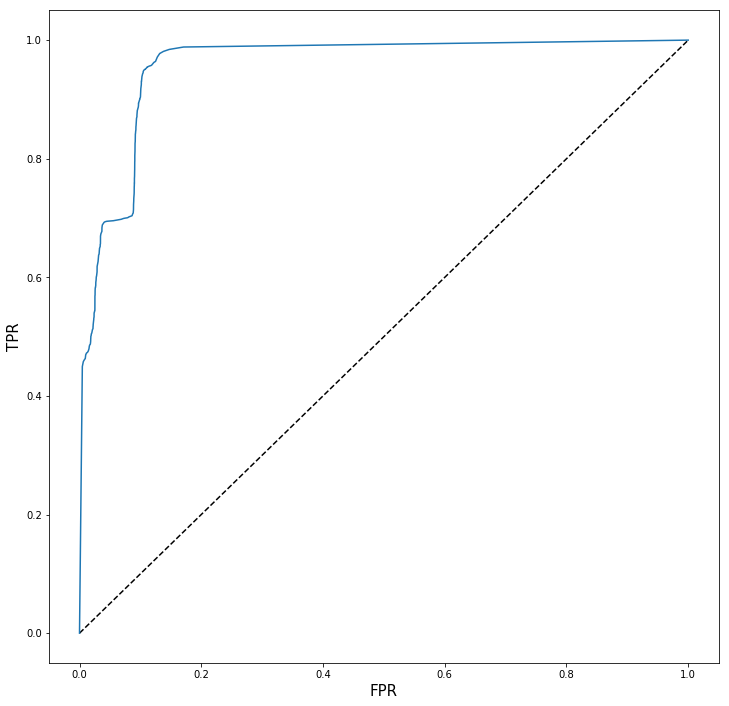

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot([0,1], [0,1], 'k--')

rf_predictions = rf.predict(X_test)
# Probabilities for each class
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probs)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression+TfidfVectorizer: ' + '(AUC = %0.3f)'%auc)
auc

In [4]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=49)

In [21]:

forest_depth=[5,10,15,20]
min_split=[2,5,10,20,50,100]
maxAuc=0
fd=0
ms=0
for maxDepth in forest_depth:
    for minSplit in min_split:
        rf = RandomForestClassifier(n_estimators = 500, random_state = 49, max_depth=maxDepth, min_samples_split=minSplit)
        rf.fit(X_train_valid, y_train_valid)
        rf_probs = rf.predict_proba(X_test_valid)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test_valid, rf_probs)
        auc = metrics.auc(fpr, tpr)
        if maxAuc<auc:
            maxAuc=auc
            fd=maxDepth
            ms=minSplit

In [25]:
print(maxAuc)

0.9999958284667795


In [26]:
print(fd)

20


In [27]:
print(ms)

2


In [5]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 49, max_depth=20)
# Train the model on training data
rf.fit(X_train_valid, y_train_valid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=49, verbose=0, warm_start=False)

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
rf_probs = rf.predict_proba(X_test_valid)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_valid, rf_probs)
auc = metrics.auc(fpr, tpr)

In [8]:
auc

0.9999958284667795

In [9]:
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probs)
auc = metrics.auc(fpr, tpr)

In [10]:
auc


0.963639262747642